# Clustering Metrics - alternatives to the _elbow method_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Create synthetic data using Scikit learn `make_blob` method

- Number of features: 4
- Number of clusters: 5
- Number of samples: 200

In [2]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

In [3]:
n_features = 4
n_cluster = 5
cluster_std = 1.2
n_samples = 200

In [4]:
data1 = make_blobs(n_samples=n_samples,n_features=n_features,centers=n_cluster,cluster_std=cluster_std)

In [5]:
d1 = data1[0]

In [6]:
df1=pd.DataFrame(data=d1,columns=['Feature_'+str(i) for i in range(1,n_features+1)])
df1.head()

,Feature_1,Feature_2,Feature_3,Feature_4
0,-5.160164,-3.885912,-3.642023,9.828856
1,2.827475,8.412541,-6.955578,0.929877
2,10.554051,-3.591823,-5.345346,-8.946437
3,-2.178034,-9.481083,-5.014157,4.281801
4,-1.614827,-1.817638,-1.422185,-10.197711


In [7]:
from itertools import combinations

In [8]:
lst_vars=list(combinations(df1.columns,2))

In [9]:
len(lst_vars)

6

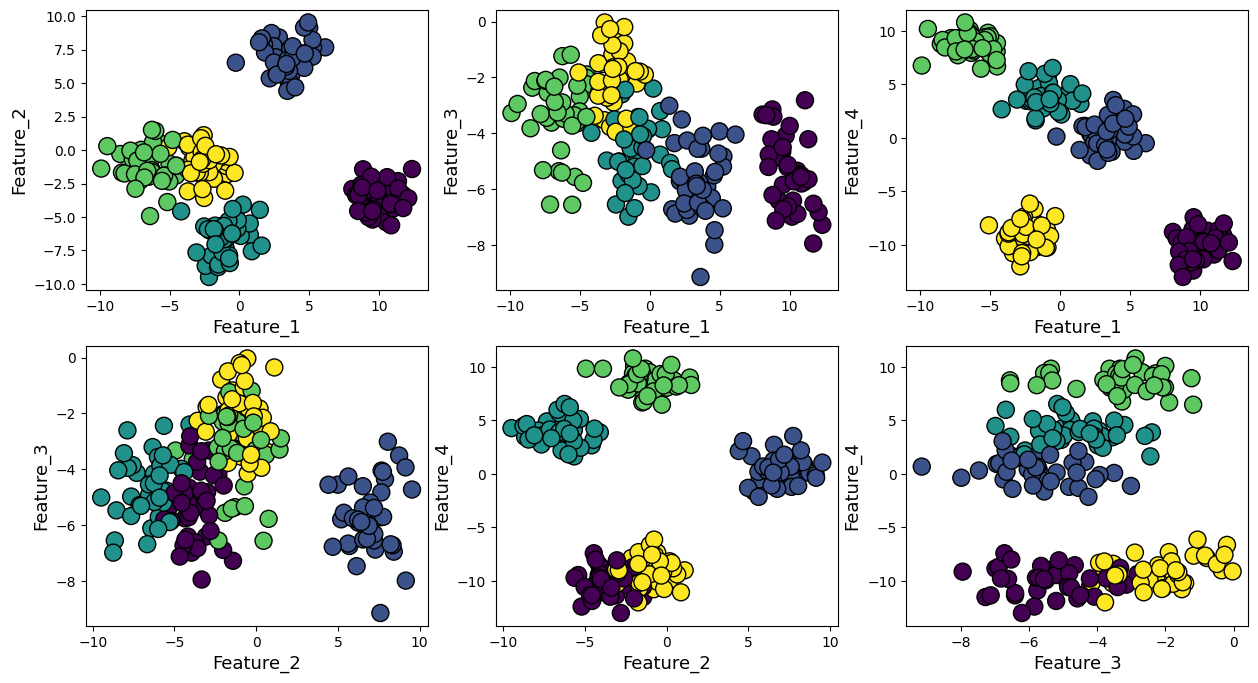

In [10]:
plt.figure(figsize=(15,8))
for i in range(1,7):
    plt.subplot(2,3,i)
    dim1=lst_vars[i-1][0]
    dim2=lst_vars[i-1][1]
    plt.scatter(df1[dim1],df1[dim2],c=data1[1],edgecolor='k',s=150)
    plt.xlabel(f"{dim1}",fontsize=13)
    plt.ylabel(f"{dim2}",fontsize=13)

### How are the classes separated (boxplots)

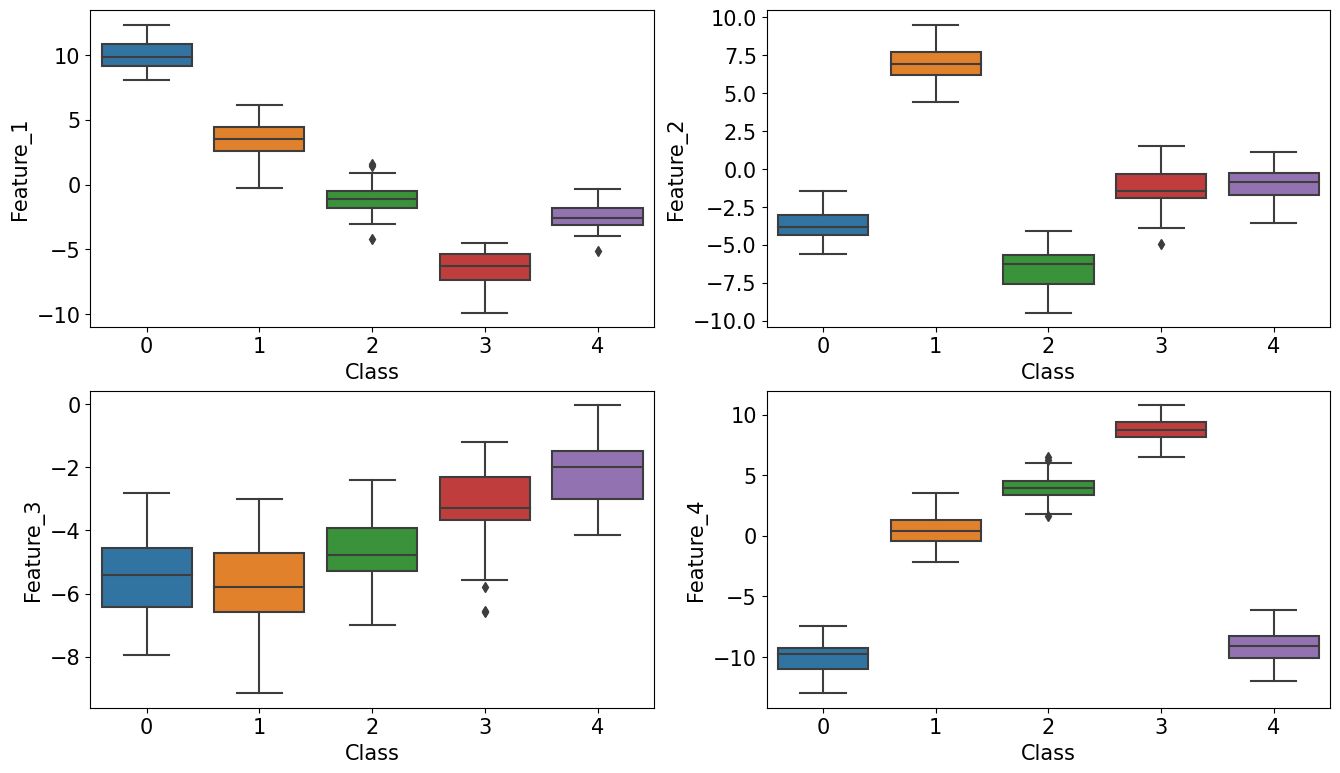

In [11]:
plt.figure(figsize=(16,14))
for i,c in enumerate(df1.columns):
    plt.subplot(3,2,i+1)
    sns.boxplot(y=df1[c],x=data1[1])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Class",fontsize=15)
    plt.ylabel(c,fontsize=15)
    #plt.show()

## k-means clustering

In [12]:
from sklearn.cluster import KMeans

### Unlabled data

In [13]:
X=df1

In [14]:
X.head()

,Feature_1,Feature_2,Feature_3,Feature_4
0,-5.160164,-3.885912,-3.642023,9.828856
1,2.827475,8.412541,-6.955578,0.929877
2,10.554051,-3.591823,-5.345346,-8.946437
3,-2.178034,-9.481083,-5.014157,4.281801
4,-1.614827,-1.817638,-1.422185,-10.197711


In [15]:
y=data1[1]

### Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
X_scaled=scaler.fit_transform(X)

### Metrics

In [19]:
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score

### Running k-means and computing inter-cluster distance score for various *k* values

In [20]:
km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    preds = km.predict(X_scaled)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(X_scaled)))
    km_scores.append(-km.score(X_scaled))
    
    silhouette = silhouette_score(X_scaled,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    
    db = davies_bouldin_score(X_scaled,preds)
    db_score.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))
    
    v_measure = v_measure_score(y,preds)
    vmeasure_score.append(v_measure)
    print("V-measure score for number of cluster(s) {}: {}".format(i,v_measure))
    print("-"*100)

c:\Users\JOY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\JOY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\JOY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\JOY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_in

Score for number of cluster(s) 2: -30.828016402617365
Silhouette score for number of cluster(s) 2: 0.4097985117260447
Davies Bouldin score for number of cluster(s) 2: 1.0675373457175081
V-measure score for number of cluster(s) 2: 0.5897275217561558
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: -18.45776513646926
Silhouette score for number of cluster(s) 3: 0.5180352326442478
Davies Bouldin score for number of cluster(s) 3: 0.812308519655419
V-measure score for number of cluster(s) 3: 0.7918756684685209
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 4: -9.319031308879124
Silhouette score for number of cluster(s) 4: 0.6227631684425493
Davies Bouldin score for number of cluster(s) 4: 0.5526033679862558
V-measure score for number of cluster(s) 4: 0.9057460992755187
------------------------------------------------------

c:\Users\JOY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\JOY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\JOY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\JOY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_in

Score for number of cluster(s) 7: -4.219161610709295
Silhouette score for number of cluster(s) 7: 0.5518883849261635
Davies Bouldin score for number of cluster(s) 7: 0.6630579971373913
V-measure score for number of cluster(s) 7: 0.9312303006445004
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 8: -3.7407337383085935
Silhouette score for number of cluster(s) 8: 0.48337722276118356
Davies Bouldin score for number of cluster(s) 8: 0.8083376511063729
V-measure score for number of cluster(s) 8: 0.8967106428472592
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 9: -3.32336605876672
Silhouette score for number of cluster(s) 9: 0.41221647299700126
Davies Bouldin score for number of cluster(s) 9: 0.8927606327110639
V-measure score for number of cluster(s) 9: 0.8644760690809022
----------------------------------------------------

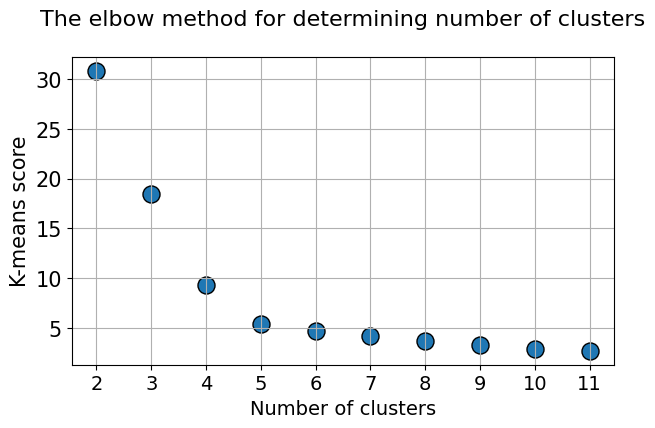

In [21]:
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

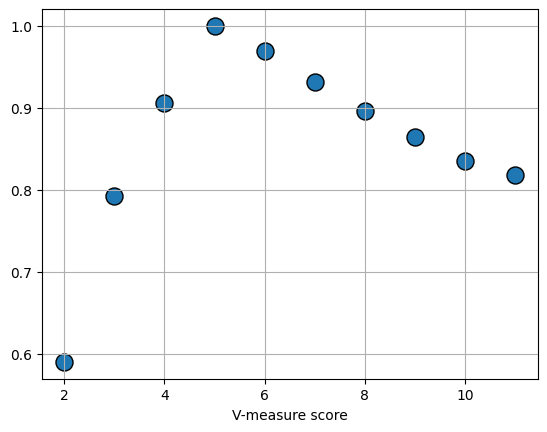

In [22]:
plt.scatter(x=[i for i in range(2,12)],y=vmeasure_score,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("V-measure score")
plt.show()

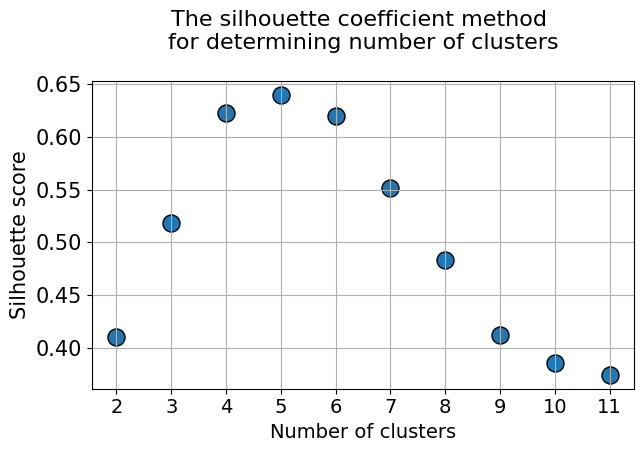

In [23]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

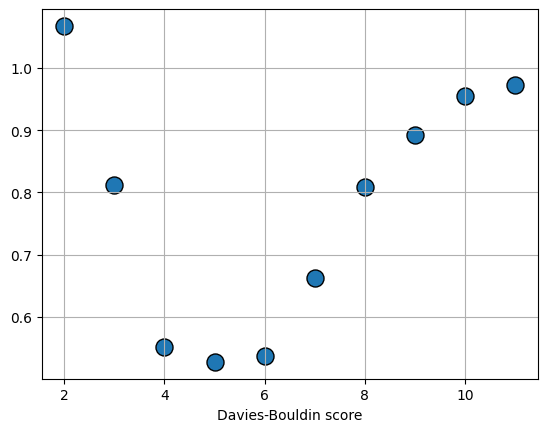

In [24]:
plt.scatter(x=[i for i in range(2,12)],y=db_score,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Davies-Bouldin score")
plt.show()

## Expectation-maximization (Gaussian Mixture Model)

In [25]:
from sklearn.mixture import GaussianMixture

In [26]:
gm_bic= []
gm_score=[]
for i in range(2,12):
    gm = GaussianMixture(n_components=i,n_init=10,tol=1e-3,max_iter=1000).fit(X_scaled)
    print("BIC for number of cluster(s) {}: {}".format(i,gm.bic(X_scaled)))
    print("Log-likelihood score for number of cluster(s) {}: {}".format(i,gm.score(X_scaled)))
    print("-"*100)
    gm_bic.append(-gm.bic(X_scaled))
    gm_score.append(gm.score(X_scaled))

BIC for number of cluster(s) 2: -639.0762637295437
Log-likelihood score for number of cluster(s) 2: 1.9818186683985919
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 3: -891.7671861046954
Log-likelihood score for number of cluster(s) 3: 2.8122328755820223
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 4: -996.0126216329763
Log-likelihood score for number of cluster(s) 4: 3.271533365648276
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 5: -1044.2326898362753
Log-likelihood score for number of cluster(s) 5: 3.590770437402075
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 6: -989.1201520930802
Log-likelihood score for number of cluster(s) 6: 3.6516759942896386
--

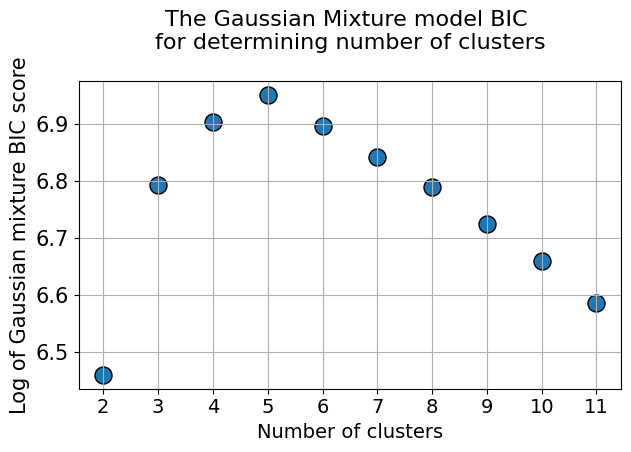

In [27]:
plt.figure(figsize=(7,4))
plt.title("The Gaussian Mixture model BIC \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=np.log(gm_bic),s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Log of Gaussian mixture BIC score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

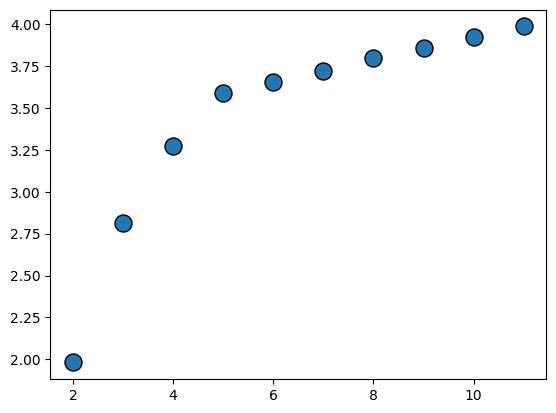

In [28]:
plt.scatter(x=[i for i in range(2,12)],y=gm_score,s=150,edgecolor='k')
plt.show()